# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

02:10:22 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=992019;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=915677;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=100838;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=749854;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=926523;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=66260;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

02:10:24 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=323334;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=712983;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

02:10:25 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=410391;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=108498;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

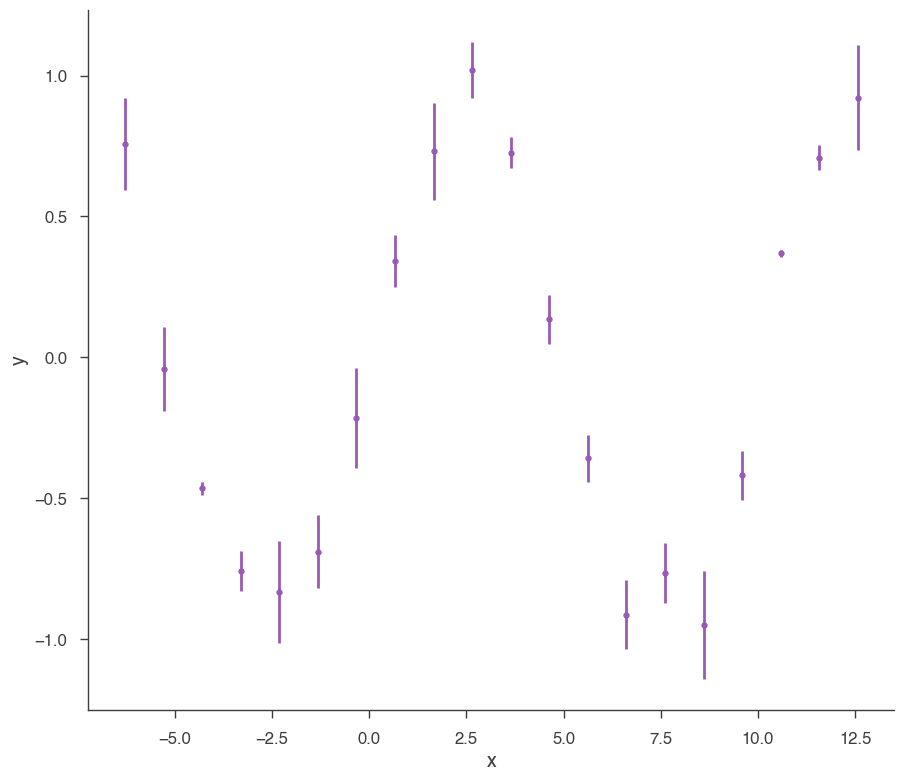

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=31234;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=259572;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

02:10:29 INFO      Mean acceptance fraction: 0.6411                                            ]8;id=92616;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=380157;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=244362;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=808239;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

02:10:30 INFO      fit restored to maximum of posterior                                         ]8;id=983474;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=873565;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.74 -0.31 +0.21) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0012 -0.0027 +0.0023) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -14.827662
total       -14.827662

Values of statistical measures:

statistical measures
AIC              34.361206
BIC              35.646788
DIC            -514.842963
PDIC           -593.915869

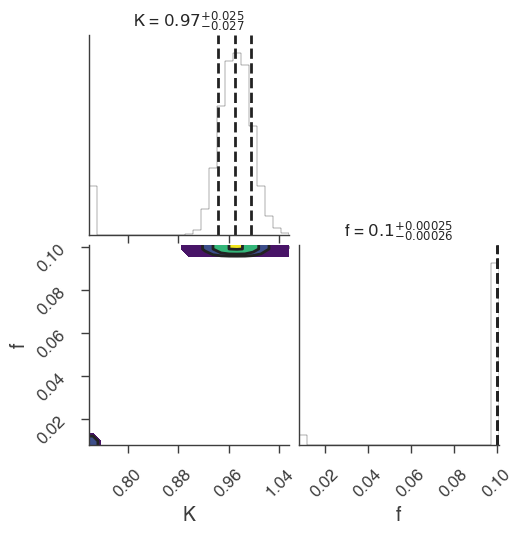

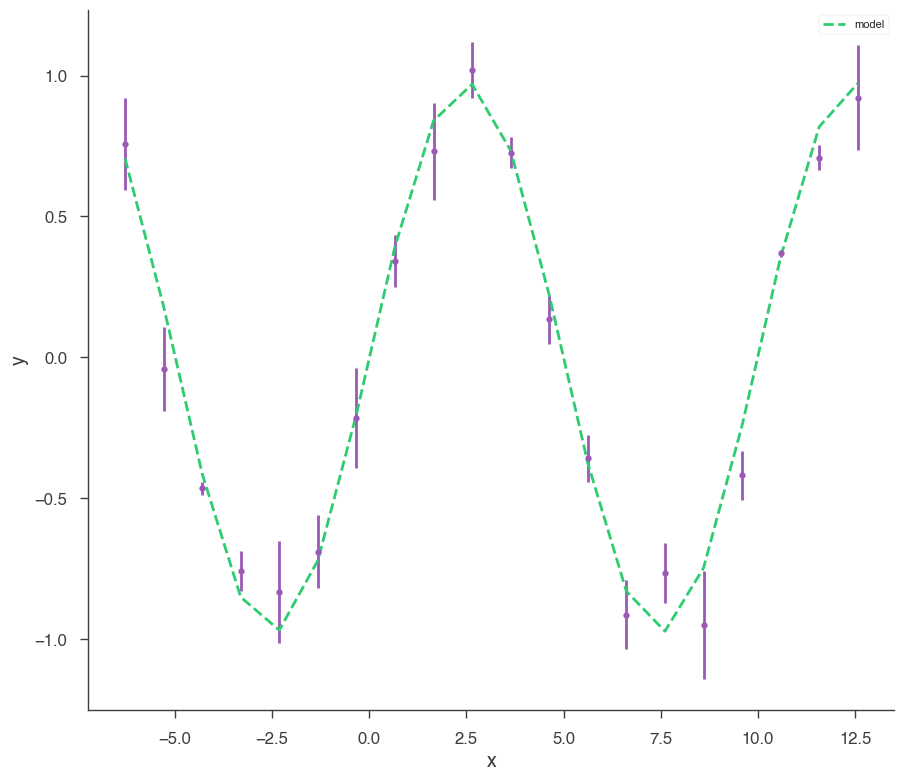

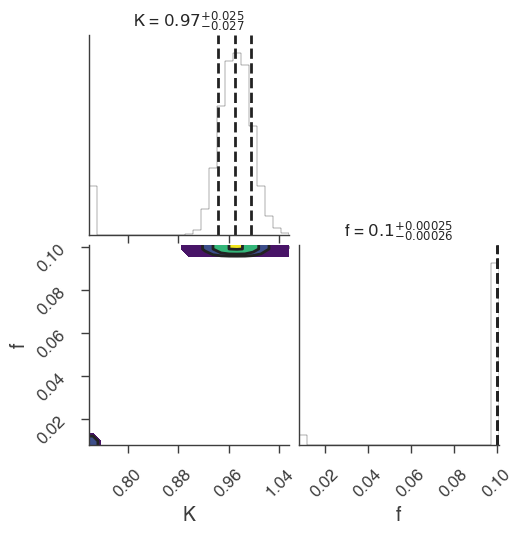

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

02:10:31 INFO      sampler set to multinest                                                ]8;id=75852;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=388920;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -24.571051238717306      +/-  0.14715409723599696     
 Total Likelihood Evaluations:         6548
 Sampling finished. Exiting MultiNest



02:10:32 INFO      fit restored to maximum of posterior                                         ]8;id=194744;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=5248;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=669321;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=559080;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.74 -0.26 +0.23) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0012 -0.0020 +0.0026) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -14.827745
total       -14.827745

Values of statistical measures:

statistical measures
AIC                34.361373
BIC                35.646955
DIC                34.021358
PDIC                2.181607
log(Z)            -10.671072

         INFO      deleting the chain directory chains                                     ]8;id=257307;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=21350;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

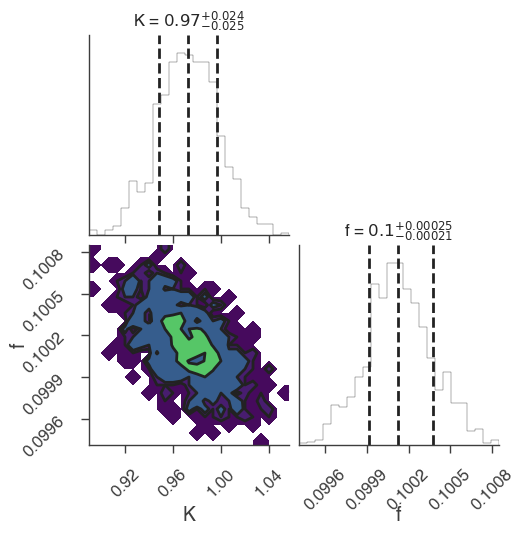

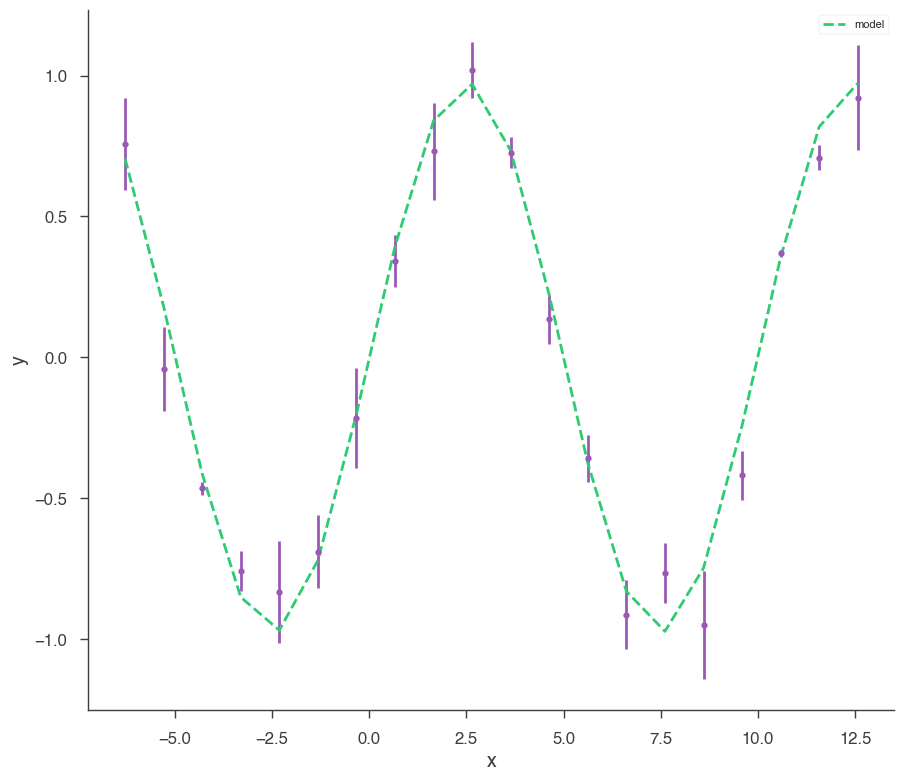

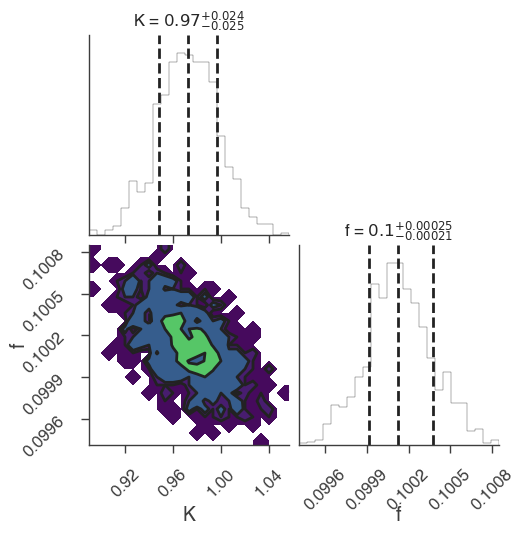

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

02:10:33 INFO      sampler set to dynesty_nested                                           ]8;id=965680;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=861376;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

188it [00:00, 1877.51it/s, bound: 0 | nc: 7 | ncall: 653 | eff(%): 28.790 | loglstar:   -inf < -3450.806 <    inf | logz: -3457.959 +/-  0.134 | dlogz: 3449.488 >  0.409]

376it [00:00, 1524.43it/s, bound: 0 | nc: 1 | ncall: 1050 | eff(%): 35.810 | loglstar:   -inf < -2125.668 <    inf | logz: -2133.078 +/-  0.132 | dlogz: 2119.399 >  0.409]

533it [00:00, 1263.13it/s, bound: 0 | nc: 1 | ncall: 1570 | eff(%): 33.949 | loglstar:   -inf < -1451.420 <    inf | logz: -1459.403 +/-  0.140 | dlogz: 1446.972 >  0.409]

665it [00:00, 1045.13it/s, bound: 0 | nc: 2 | ncall: 2165 | eff(%): 30.716 | loglstar:   -inf < -1121.452 <    inf | logz: -1128.707 +/-  0.132 | dlogz: 1112.993 >  0.409]

776it [00:00, 896.69it/s, bound: 0 | nc: 10 | ncall: 3023 | eff(%): 25.670 | loglstar:   -inf < -907.390 <    inf | logz: -914.575 +/-  0.126 | dlogz: 898.067 >  0.409]   

871it [00:00, 760.83it/s, bound: 0 | nc: 2 | ncall: 3811 | eff(%): 22.855 | loglstar:   -inf < -788.224 <    inf | logz: -796.137 +/-  0.130 | dlogz: 779.601 >  0.409] 

952it [00:01, 595.69it/s, bound: 0 | nc: 12 | ncall: 4929 | eff(%): 19.314 | loglstar:   -inf < -705.703 <    inf | logz: -713.407 +/-  0.133 | dlogz: 696.598 >  0.409]

1018it [00:01, 543.94it/s, bound: 0 | nc: 1 | ncall: 5818 | eff(%): 17.497 | loglstar:   -inf < -632.835 <    inf | logz: -640.658 +/-  0.136 | dlogz: 623.778 >  0.409]

1076it [00:01, 496.42it/s, bound: 0 | nc: 54 | ncall: 6645 | eff(%): 16.193 | loglstar:   -inf < -590.057 <    inf | logz: -597.606 +/-  0.130 | dlogz: 580.221 >  0.409]

1128it [00:01, 429.55it/s, bound: 0 | nc: 19 | ncall: 7484 | eff(%): 15.072 | loglstar:   -inf < -564.690 <    inf | logz: -572.829 +/-  0.130 | dlogz: 555.461 >  0.409]

1173it [00:01, 398.82it/s, bound: 0 | nc: 35 | ncall: 8291 | eff(%): 14.148 | loglstar:   -inf < -539.546 <    inf | logz: -547.991 +/-  0.134 | dlogz: 530.626 >  0.409]

1214it [00:02, 316.77it/s, bound: 0 | nc: 33 | ncall: 9240 | eff(%): 13.139 | loglstar:   -inf < -520.777 <    inf | logz: -529.186 +/-  0.137 | dlogz: 511.800 >  0.409]

1248it [00:02, 280.04it/s, bound: 0 | nc: 55 | ncall: 10050 | eff(%): 12.418 | loglstar:   -inf < -505.300 <    inf | logz: -513.889 +/-  0.142 | dlogz: 496.586 >  0.409]

1278it [00:02, 221.43it/s, bound: 0 | nc: 32 | ncall: 10850 | eff(%): 11.779 | loglstar:   -inf < -499.372 <    inf | logz: -506.987 +/-  0.129 | dlogz: 489.002 >  0.409]

1303it [00:02, 194.69it/s, bound: 0 | nc: 36 | ncall: 11380 | eff(%): 11.450 | loglstar:   -inf < -492.567 <    inf | logz: -500.471 +/-  0.131 | dlogz: 482.471 >  0.409]

1324it [00:02, 176.52it/s, bound: 0 | nc: 25 | ncall: 12216 | eff(%): 10.838 | loglstar:   -inf < -490.147 <    inf | logz: -497.042 +/-  0.125 | dlogz: 478.823 >  0.409]

1343it [00:02, 161.18it/s, bound: 0 | nc: 16 | ncall: 12947 | eff(%): 10.373 | loglstar:   -inf < -487.385 <    inf | logz: -494.847 +/-  0.126 | dlogz: 476.640 >  0.409]

1360it [00:03, 159.19it/s, bound: 0 | nc: 38 | ncall: 13422 | eff(%): 10.133 | loglstar:   -inf < -484.162 <    inf | logz: -491.932 +/-  0.128 | dlogz: 473.706 >  0.409]

1377it [00:03, 131.13it/s, bound: 1 | nc: 2 | ncall: 13678 | eff(%): 10.067 | loglstar:   -inf < -479.185 <    inf | logz: -487.756 +/-  0.137 | dlogz: 469.785 >  0.409] 

1477it [00:03, 302.43it/s, bound: 1 | nc: 3 | ncall: 13877 | eff(%): 10.644 | loglstar:   -inf < -384.872 <    inf | logz: -394.871 +/-  0.152 | dlogz: 377.769 >  0.409]

1577it [00:03, 452.45it/s, bound: 1 | nc: 11 | ncall: 14138 | eff(%): 11.154 | loglstar:   -inf < -287.240 <    inf | logz: -296.183 +/-  0.144 | dlogz: 277.621 >  0.409]

1634it [00:03, 375.91it/s, bound: 2 | nc: 1 | ncall: 14264 | eff(%): 11.455 | loglstar:   -inf < -254.761 <    inf | logz: -263.545 +/-  0.143 | dlogz: 244.773 >  0.409] 

1763it [00:03, 567.49it/s, bound: 2 | nc: 4 | ncall: 14469 | eff(%): 12.185 | loglstar:   -inf < -195.281 <    inf | logz: -204.404 +/-  0.143 | dlogz: 185.284 >  0.409]

1889it [00:03, 725.93it/s, bound: 2 | nc: 7 | ncall: 14712 | eff(%): 12.840 | loglstar:   -inf < -152.625 <    inf | logz: -161.591 +/-  0.142 | dlogz: 142.039 >  0.409]

1977it [00:04, 586.42it/s, bound: 3 | nc: 1 | ncall: 14893 | eff(%): 13.275 | loglstar:   -inf < -129.795 <    inf | logz: -139.157 +/-  0.147 | dlogz: 119.413 >  0.409]

2100it [00:04, 723.22it/s, bound: 3 | nc: 5 | ncall: 15120 | eff(%): 13.889 | loglstar:   -inf < -99.133 <    inf | logz: -108.303 +/-  0.146 | dlogz: 88.188 >  0.409]  

2194it [00:04, 772.21it/s, bound: 3 | nc: 2 | ncall: 15311 | eff(%): 14.330 | loglstar:   -inf < -84.630 <    inf | logz: -94.313 +/-  0.144 | dlogz: 74.042 >  0.409] 

2284it [00:04, 487.63it/s, bound: 4 | nc: 2 | ncall: 15494 | eff(%): 14.741 | loglstar:   -inf < -72.100 <    inf | logz: -81.751 +/-  0.146 | dlogz: 61.250 >  0.409]

2432it [00:04, 663.53it/s, bound: 4 | nc: 2 | ncall: 15725 | eff(%): 15.466 | loglstar:   -inf < -57.642 <    inf | logz: -67.240 +/-  0.147 | dlogz: 46.386 >  0.409]

2573it [00:04, 813.87it/s, bound: 4 | nc: 8 | ncall: 15988 | eff(%): 16.093 | loglstar:   -inf < -45.467 <    inf | logz: -55.352 +/-  0.150 | dlogz: 34.141 >  0.409]

2681it [00:05, 671.72it/s, bound: 5 | nc: 3 | ncall: 16167 | eff(%): 16.583 | loglstar:   -inf < -38.231 <    inf | logz: -47.900 +/-  0.148 | dlogz: 26.386 >  0.409]

2816it [00:05, 804.16it/s, bound: 5 | nc: 4 | ncall: 16408 | eff(%): 17.162 | loglstar:   -inf < -31.680 <    inf | logz: -41.480 +/-  0.149 | dlogz: 19.620 >  0.409]

2919it [00:05, 642.17it/s, bound: 6 | nc: 1 | ncall: 16660 | eff(%): 17.521 | loglstar:   -inf < -27.872 <    inf | logz: -37.574 +/-  0.149 | dlogz: 15.444 >  0.409]

3060it [00:05, 788.62it/s, bound: 6 | nc: 1 | ncall: 16865 | eff(%): 18.144 | loglstar:   -inf < -24.045 <    inf | logz: -33.937 +/-  0.149 | dlogz: 11.451 >  0.409]

3188it [00:05, 892.79it/s, bound: 6 | nc: 6 | ncall: 17103 | eff(%): 18.640 | loglstar:   -inf < -21.387 <    inf | logz: -31.282 +/-  0.149 | dlogz:  8.470 >  0.409]

3297it [00:05, 756.55it/s, bound: 7 | nc: 1 | ncall: 17319 | eff(%): 19.037 | loglstar:   -inf < -19.931 <    inf | logz: -29.698 +/-  0.149 | dlogz:  6.610 >  0.409]

3492it [00:05, 1009.53it/s, bound: 7 | nc: 2 | ncall: 17593 | eff(%): 19.849 | loglstar:   -inf < -18.111 <    inf | logz: -27.872 +/-  0.148 | dlogz:  4.305 >  0.409]

3624it [00:06, 1078.90it/s, bound: 7 | nc: 9 | ncall: 17861 | eff(%): 20.290 | loglstar:   -inf < -17.187 <    inf | logz: -27.041 +/-  0.148 | dlogz:  3.172 >  0.409]

3750it [00:06, 882.84it/s, bound: 8 | nc: 1 | ncall: 18001 | eff(%): 20.832 | loglstar:   -inf < -16.676 <    inf | logz: -26.464 +/-  0.148 | dlogz:  2.346 >  0.409] 

3865it [00:06, 941.04it/s, bound: 8 | nc: 2 | ncall: 18188 | eff(%): 21.250 | loglstar:   -inf < -16.191 <    inf | logz: -26.059 +/-  0.148 | dlogz:  1.744 >  0.409]

3986it [00:06, 1002.01it/s, bound: 8 | nc: 2 | ncall: 18437 | eff(%): 21.620 | loglstar:   -inf < -15.877 <    inf | logz: -25.741 +/-  0.148 | dlogz:  1.267 >  0.409]

4098it [00:06, 715.43it/s, bound: 9 | nc: 1 | ncall: 18577 | eff(%): 22.060 | loglstar:   -inf < -15.607 <    inf | logz: -25.513 +/-  0.149 | dlogz:  0.930 >  0.409] 

4206it [00:06, 787.46it/s, bound: 9 | nc: 1 | ncall: 18746 | eff(%): 22.437 | loglstar:   -inf < -15.431 <    inf | logz: -25.342 +/-  0.149 | dlogz:  0.686 >  0.409]

4325it [00:06, 876.95it/s, bound: 9 | nc: 2 | ncall: 18998 | eff(%): 22.766 | loglstar:   -inf < -15.265 <    inf | logz: -25.199 +/-  0.149 | dlogz:  0.492 >  0.409]

4391it [00:07, 580.34it/s, +400 | bound: 10 | nc: 1 | ncall: 19508 | eff(%): 25.073 | loglstar:   -inf < -14.855 <    inf | logz: -24.780 +/-  0.150 | dlogz:  0.001 >  0.409]

02:10:41 INFO      fit restored to maximum of posterior                                         ]8;id=424876;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=214403;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=377810;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=16898;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.74 -0.26 +0.23) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0012 -0.0023 +0.0024) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -14.828027
total       -14.828027

Values of statistical measures:

statistical measures
AIC                34.361937
BIC                35.647519
DIC                33.805455
PDIC                2.074191
log(Z)            -10.761834

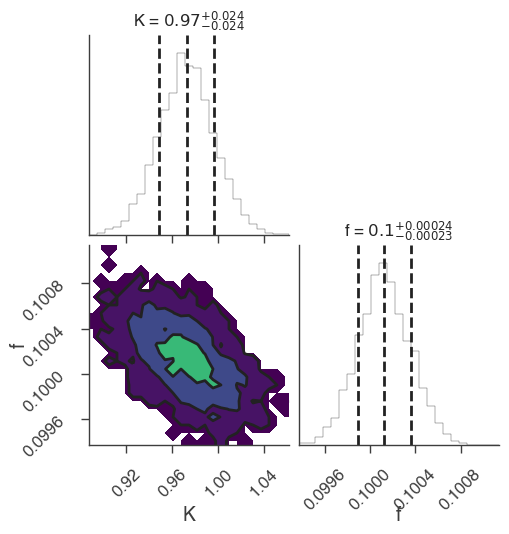

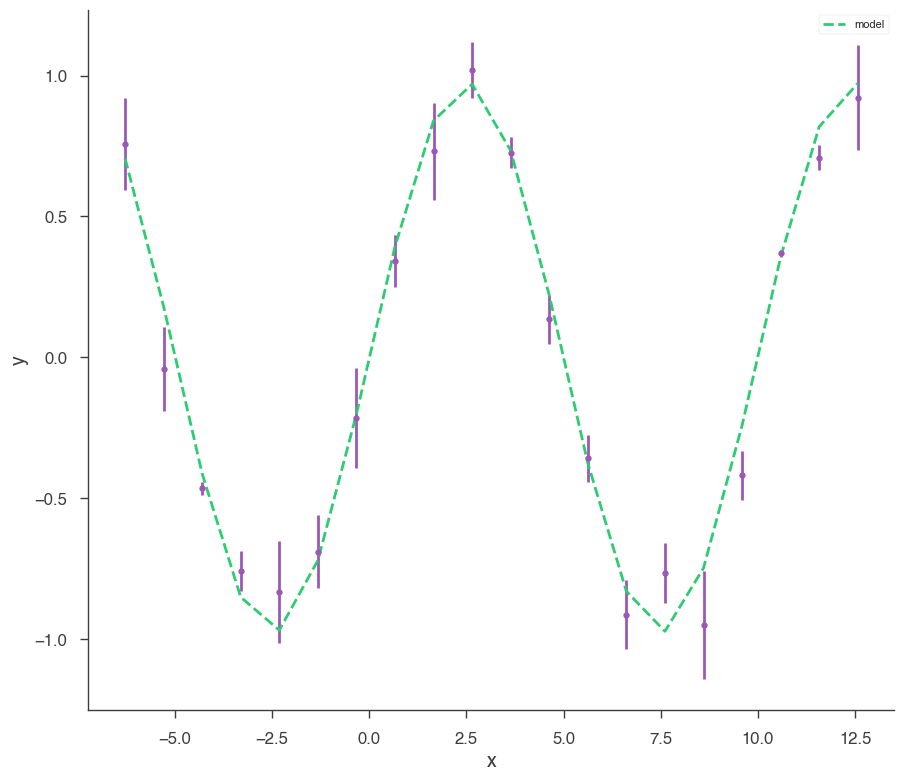

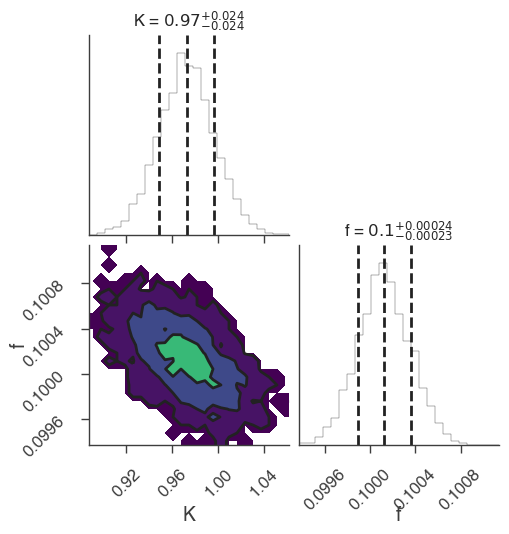

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

02:10:43 INFO      sampler set to dynesty_dynamic                                          ]8;id=30130;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=466099;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

63it [00:00, 628.57it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 71 | eff(%): 11.033 | loglstar:   -inf < -6617.294 <    inf | logz: -6623.585 +/-  0.109 | dlogz: 6479.963 >  0.010]

223it [00:00, 1196.77it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 298 | eff(%): 27.945 | loglstar:   -inf < -3566.685 <    inf | logz: -3573.342 +/-  0.112 | dlogz: 3483.040 >  0.010]

355it [00:00, 1252.58it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 544 | eff(%): 34.004 | loglstar:   -inf < -2723.180 <    inf | logz: -2729.921 +/-  0.110 | dlogz: 2678.758 >  0.010]

481it [00:00, 1130.64it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 837 | eff(%): 35.976 | loglstar:   -inf < -2116.768 <    inf | logz: -2124.576 +/-  0.123 | dlogz: 2103.766 >  0.010]

596it [00:00, 1027.56it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 1213 | eff(%): 34.793 | loglstar:   -inf < -1722.351 <    inf | logz: -1729.637 +/-  0.113 | dlogz: 1706.076 >  0.010]

701it [00:00, 879.52it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 1607 | eff(%): 33.270 | loglstar:   -inf < -1457.031 <    inf | logz: -1464.860 +/-  0.118 | dlogz: 1441.478 >  0.010]  

793it [00:00, 762.58it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2030 | eff(%): 31.344 | loglstar:   -inf < -1288.464 <    inf | logz: -1296.638 +/-  0.124 | dlogz: 1273.823 >  0.010]

874it [00:01, 679.33it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2422 | eff(%): 29.911 | loglstar:   -inf < -1125.992 <    inf | logz: -1133.370 +/-  0.116 | dlogz: 1109.061 >  0.010]

946it [00:01, 627.50it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2881 | eff(%): 27.980 | loglstar:   -inf < -1007.745 <    inf | logz: -1015.580 +/-  0.120 | dlogz: 991.379 >  0.010] 

1011it [00:01, 622.90it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 3324 | eff(%): 26.438 | loglstar:   -inf < -937.846 <    inf | logz: -945.186 +/-  0.118 | dlogz: 920.398 >  0.010] 

1075it [00:01, 602.45it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 3787 | eff(%): 25.076 | loglstar:   -inf < -862.581 <    inf | logz: -871.355 +/-  0.127 | dlogz: 847.864 >  0.010]

1136it [00:01, 577.55it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 4355 | eff(%): 23.399 | loglstar:   -inf < -795.521 <    inf | logz: -803.838 +/-  0.120 | dlogz: 779.175 >  0.010]

1195it [00:01, 504.65it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 4959 | eff(%): 21.890 | loglstar:   -inf < -742.809 <    inf | logz: -751.052 +/-  0.121 | dlogz: 729.583 >  0.010]

1247it [00:01, 491.27it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 5471 | eff(%): 20.884 | loglstar:   -inf < -686.787 <    inf | logz: -695.570 +/-  0.125 | dlogz: 677.693 >  0.010]

1297it [00:01, 426.03it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 5973 | eff(%): 20.037 | loglstar:   -inf < -649.889 <    inf | logz: -657.876 +/-  0.119 | dlogz: 639.271 >  0.010]

1342it [00:02, 373.49it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 6677 | eff(%): 18.699 | loglstar:   -inf < -611.492 <    inf | logz: -619.515 +/-  0.123 | dlogz: 600.872 >  0.010] 

1381it [00:02, 363.49it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 7161 | eff(%): 18.026 | loglstar:   -inf < -590.466 <    inf | logz: -598.687 +/-  0.122 | dlogz: 579.954 >  0.010]

1419it [00:02, 292.41it/s, batch: 0 | bound: 0 | nc: 46 | ncall: 8069 | eff(%): 16.560 | loglstar:   -inf < -565.634 <    inf | logz: -574.454 +/-  0.123 | dlogz: 557.328 >  0.010]

1451it [00:02, 271.48it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 8671 | eff(%): 15.822 | loglstar:   -inf < -551.724 <    inf | logz: -559.658 +/-  0.119 | dlogz: 542.092 >  0.010]

1480it [00:02, 267.73it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 9157 | eff(%): 15.326 | loglstar:   -inf < -541.268 <    inf | logz: -549.486 +/-  0.119 | dlogz: 531.916 >  0.010]

1508it [00:02, 267.71it/s, batch: 0 | bound: 0 | nc: 72 | ncall: 9555 | eff(%): 14.998 | loglstar:   -inf < -531.499 <    inf | logz: -539.458 +/-  0.119 | dlogz: 521.789 >  0.010]

1536it [00:02, 228.05it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 10269 | eff(%): 14.263 | loglstar:   -inf < -520.750 <    inf | logz: -529.019 +/-  0.120 | dlogz: 511.385 >  0.010]

1560it [00:03, 210.95it/s, batch: 0 | bound: 0 | nc: 16 | ncall: 10829 | eff(%): 13.770 | loglstar:   -inf < -514.342 <    inf | logz: -522.461 +/-  0.118 | dlogz: 504.641 >  0.010]

1586it [00:03, 220.45it/s, batch: 0 | bound: 0 | nc: 28 | ncall: 11373 | eff(%): 13.358 | loglstar:   -inf < -507.035 <    inf | logz: -514.934 +/-  0.118 | dlogz: 497.032 >  0.010]

1609it [00:03, 213.39it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 11862 | eff(%): 13.016 | loglstar:   -inf < -502.399 <    inf | logz: -510.397 +/-  0.118 | dlogz: 492.435 >  0.010]

1631it [00:03, 203.62it/s, batch: 0 | bound: 0 | nc: 13 | ncall: 12395 | eff(%): 12.648 | loglstar:   -inf < -498.966 <    inf | logz: -506.592 +/-  0.115 | dlogz: 488.533 >  0.010]

1652it [00:03, 183.02it/s, batch: 0 | bound: 0 | nc: 52 | ncall: 13149 | eff(%): 12.103 | loglstar:   -inf < -495.642 <    inf | logz: -503.351 +/-  0.116 | dlogz: 485.258 >  0.010]

1671it [00:03, 180.22it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 13569 | eff(%): 11.877 | loglstar:   -inf < -492.963 <    inf | logz: -500.547 +/-  0.115 | dlogz: 482.388 >  0.010] 

1690it [00:03, 170.02it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 14118 | eff(%): 11.561 | loglstar:   -inf < -490.734 <    inf | logz: -498.143 +/-  0.114 | dlogz: 479.919 >  0.010]

1708it [00:04, 151.32it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 14903 | eff(%): 11.089 | loglstar:   -inf < -489.088 <    inf | logz: -496.348 +/-  0.112 | dlogz: 478.067 >  0.010] 

1724it [00:04, 144.87it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 15533 | eff(%): 10.753 | loglstar:   -inf < -487.731 <    inf | logz: -494.848 +/-  0.112 | dlogz: 476.522 >  0.010]

1739it [00:04, 143.59it/s, batch: 0 | bound: 0 | nc: 25 | ncall: 15967 | eff(%): 10.561 | loglstar:   -inf < -485.931 <    inf | logz: -493.368 +/-  0.113 | dlogz: 475.032 >  0.010]

1754it [00:04, 137.69it/s, batch: 0 | bound: 0 | nc: 64 | ncall: 16488 | eff(%): 10.325 | loglstar:   -inf < -483.740 <    inf | logz: -491.477 +/-  0.115 | dlogz: 473.145 >  0.010]

1768it [00:04, 118.24it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 17177 | eff(%): 10.002 | loglstar:   -inf < -482.363 <    inf | logz: -489.904 +/-  0.115 | dlogz: 471.526 >  0.010]

1781it [00:04, 98.53it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17231 | eff(%): 10.045 | loglstar:   -inf < -478.291 <    inf | logz: -486.824 +/-  0.122 | dlogz: 468.580 >  0.010]  

1903it [00:04, 342.15it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17395 | eff(%): 10.634 | loglstar:   -inf < -394.572 <    inf | logz: -404.175 +/-  0.136 | dlogz: 386.362 >  0.010]

2012it [00:04, 518.94it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17575 | eff(%): 11.131 | loglstar:   -inf < -303.936 <    inf | logz: -312.899 +/-  0.130 | dlogz: 294.212 >  0.010]

2110it [00:05, 635.35it/s, batch: 0 | bound: 1 | nc: 10 | ncall: 17784 | eff(%): 11.540 | loglstar:   -inf < -239.147 <    inf | logz: -248.787 +/-  0.132 | dlogz: 230.067 >  0.010]

2184it [00:05, 462.23it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17973 | eff(%): 11.823 | loglstar:   -inf < -214.661 <    inf | logz: -223.759 +/-  0.128 | dlogz: 204.645 >  0.010] 

2329it [00:05, 668.32it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18172 | eff(%): 12.473 | loglstar:   -inf < -166.947 <    inf | logz: -176.793 +/-  0.132 | dlogz: 157.537 >  0.010]

2450it [00:05, 790.93it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 18397 | eff(%): 12.965 | loglstar:   -inf < -137.347 <    inf | logz: -146.286 +/-  0.128 | dlogz: 126.547 >  0.010]

2564it [00:05, 876.71it/s, batch: 0 | bound: 2 | nc: 8 | ncall: 18669 | eff(%): 13.376 | loglstar:   -inf < -116.724 <    inf | logz: -125.797 +/-  0.127 | dlogz: 105.817 >  0.010]

2666it [00:05, 649.33it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18826 | eff(%): 13.795 | loglstar:   -inf < -97.584 <    inf | logz: -107.316 +/-  0.133 | dlogz: 87.201 >  0.010]  

2843it [00:05, 883.66it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19112 | eff(%): 14.496 | loglstar:   -inf < -75.599 <    inf | logz: -85.425 +/-  0.132 | dlogz: 64.959 >  0.010] 

2964it [00:06, 957.01it/s, batch: 0 | bound: 3 | nc: 5 | ncall: 19365 | eff(%): 14.921 | loglstar:   -inf < -63.613 <    inf | logz: -73.587 +/-  0.134 | dlogz: 52.868 >  0.010]

3078it [00:06, 710.67it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19553 | eff(%): 15.349 | loglstar:   -inf < -54.038 <    inf | logz: -63.568 +/-  0.133 | dlogz: 42.559 >  0.010]

3220it [00:06, 852.16it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19775 | eff(%): 15.882 | loglstar:   -inf < -44.831 <    inf | logz: -54.814 +/-  0.134 | dlogz: 33.533 >  0.010]

3338it [00:06, 923.84it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 20025 | eff(%): 16.263 | loglstar:   -inf < -38.541 <    inf | logz: -48.292 +/-  0.133 | dlogz: 26.748 >  0.010]

3449it [00:06, 675.43it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20246 | eff(%): 16.625 | loglstar:   -inf < -33.926 <    inf | logz: -43.846 +/-  0.132 | dlogz: 22.075 >  0.010]

3598it [00:06, 831.90it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20446 | eff(%): 17.178 | loglstar:   -inf < -29.755 <    inf | logz: -39.524 +/-  0.132 | dlogz: 17.448 >  0.010]

3731it [00:07, 939.48it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 20688 | eff(%): 17.609 | loglstar:   -inf < -26.316 <    inf | logz: -36.220 +/-  0.133 | dlogz: 13.874 >  0.010]

3846it [00:07, 953.90it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20944 | eff(%): 17.935 | loglstar:   -inf < -24.011 <    inf | logz: -33.925 +/-  0.133 | dlogz: 11.353 >  0.010]

3957it [00:07, 685.95it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21076 | eff(%): 18.340 | loglstar:   -inf < -22.254 <    inf | logz: -32.177 +/-  0.133 | dlogz:  9.379 >  0.010]

4113it [00:07, 855.88it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21310 | eff(%): 18.858 | loglstar:   -inf < -20.265 <    inf | logz: -30.195 +/-  0.133 | dlogz:  7.116 >  0.010]

4222it [00:07, 906.56it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21550 | eff(%): 19.147 | loglstar:   -inf < -19.102 <    inf | logz: -29.078 +/-  0.134 | dlogz:  5.781 >  0.010]

4331it [00:07, 714.99it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21774 | eff(%): 19.444 | loglstar:   -inf < -18.399 <    inf | logz: -28.248 +/-  0.133 | dlogz:  4.741 >  0.010]

4478it [00:07, 868.13it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21964 | eff(%): 19.934 | loglstar:   -inf < -17.472 <    inf | logz: -27.376 +/-  0.133 | dlogz:  3.606 >  0.010]

4605it [00:08, 957.19it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22178 | eff(%): 20.306 | loglstar:   -inf < -16.952 <    inf | logz: -26.811 +/-  0.133 | dlogz:  2.819 >  0.010]

4725it [00:08, 1016.00it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22440 | eff(%): 20.597 | loglstar:   -inf < -16.430 <    inf | logz: -26.375 +/-  0.133 | dlogz:  2.202 >  0.010]

4840it [00:08, 745.09it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22587 | eff(%): 20.964 | loglstar:   -inf < -16.101 <    inf | logz: -26.036 +/-  0.133 | dlogz:  1.714 >  0.010] 

4970it [00:08, 858.58it/s, batch: 0 | bound: 8 | nc: 5 | ncall: 22827 | eff(%): 21.306 | loglstar:   -inf < -15.791 <    inf | logz: -25.734 +/-  0.133 | dlogz:  1.280 >  0.010]

5075it [00:08, 888.86it/s, batch: 0 | bound: 8 | nc: 4 | ncall: 23066 | eff(%): 21.535 | loglstar:   -inf < -15.617 <    inf | logz: -25.545 +/-  0.134 | dlogz:  1.008 >  0.010]

5178it [00:08, 638.07it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23269 | eff(%): 21.785 | loglstar:   -inf < -15.469 <    inf | logz: -25.395 +/-  0.134 | dlogz:  0.797 >  0.010]

5349it [00:08, 845.33it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 23510 | eff(%): 22.278 | loglstar:   -inf < -15.280 <    inf | logz: -25.205 +/-  0.134 | dlogz:  0.540 >  0.010]

5459it [00:09, 895.46it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 23731 | eff(%): 22.529 | loglstar:   -inf < -15.193 <    inf | logz: -25.113 +/-  0.134 | dlogz:  0.421 >  0.010]

5572it [00:09, 666.84it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23976 | eff(%): 22.765 | loglstar:   -inf < -15.121 <    inf | logz: -25.038 +/-  0.134 | dlogz:  0.328 >  0.010]

5663it [00:09, 708.04it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24085 | eff(%): 23.034 | loglstar:   -inf < -15.075 <    inf | logz: -24.989 +/-  0.134 | dlogz:  0.268 >  0.010]

5756it [00:09, 754.95it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24247 | eff(%): 23.259 | loglstar:   -inf < -15.031 <    inf | logz: -24.947 +/-  0.134 | dlogz:  0.219 >  0.010]

5900it [00:09, 913.96it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24542 | eff(%): 23.560 | loglstar:   -inf < -14.985 <    inf | logz: -24.896 +/-  0.134 | dlogz:  0.161 >  0.010]

6006it [00:10, 451.94it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24765 | eff(%): 23.772 | loglstar:   -inf < -14.963 <    inf | logz: -24.867 +/-  0.134 | dlogz:  0.129 >  0.010]

6166it [00:10, 618.11it/s, batch: 0 | bound: 11 | nc: 4 | ncall: 24972 | eff(%): 24.207 | loglstar:   -inf < -14.935 <    inf | logz: -24.833 +/-  0.133 | dlogz:  0.092 >  0.010]

6270it [00:10, 558.82it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25137 | eff(%): 24.457 | loglstar:   -inf < -14.922 <    inf | logz: -24.817 +/-  0.133 | dlogz:  0.074 >  0.010]

6356it [00:10, 414.27it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25311 | eff(%): 24.625 | loglstar:   -inf < -14.911 <    inf | logz: -24.805 +/-  0.133 | dlogz:  0.062 >  0.010]

6423it [00:11, 409.27it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25443 | eff(%): 24.758 | loglstar:   -inf < -14.904 <    inf | logz: -24.798 +/-  0.133 | dlogz:  0.054 >  0.010]

6482it [00:11, 349.96it/s, batch: 0 | bound: 12 | nc: 2 | ncall: 25520 | eff(%): 24.912 | loglstar:   -inf < -14.898 <    inf | logz: -24.792 +/-  0.133 | dlogz:  0.048 >  0.010]

6626it [00:11, 511.95it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25702 | eff(%): 25.288 | loglstar:   -inf < -14.887 <    inf | logz: -24.780 +/-  0.133 | dlogz:  0.036 >  0.010]

6774it [00:11, 680.06it/s, batch: 0 | bound: 12 | nc: 7 | ncall: 25947 | eff(%): 25.613 | loglstar:   -inf < -14.880 <    inf | logz: -24.771 +/-  0.133 | dlogz:  0.027 >  0.010]

6891it [00:11, 774.81it/s, batch: 0 | bound: 12 | nc: 6 | ncall: 26216 | eff(%): 25.794 | loglstar:   -inf < -14.876 <    inf | logz: -24.766 +/-  0.133 | dlogz:  0.021 >  0.010]

6994it [00:11, 666.51it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26345 | eff(%): 26.053 | loglstar:   -inf < -14.872 <    inf | logz: -24.762 +/-  0.133 | dlogz:  0.017 >  0.010]

7185it [00:11, 916.65it/s, batch: 0 | bound: 13 | nc: 4 | ncall: 26654 | eff(%): 26.460 | loglstar:   -inf < -14.866 <    inf | logz: -24.756 +/-  0.133 | dlogz:  0.012 >  0.010]

7483it [00:12, 1378.49it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27034 | eff(%): 27.401 | loglstar:   -inf < -14.860 <    inf | logz: -24.750 +/-  0.133 | dlogz:  0.005 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7758it [00:13, 489.58it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27309 | eff(%): 28.408 | loglstar: -16.639 < -16.053 < -15.305 | logz: -24.745 +/-  0.137 | stop:  1.314]          

7914it [00:13, 585.83it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27502 | eff(%): 28.228 | loglstar: -16.639 < -16.119 < -15.305 | logz: -24.745 +/-  0.137 | stop:  1.314]

8058it [00:13, 682.98it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27758 | eff(%): 28.482 | loglstar: -16.639 < -15.830 < -15.305 | logz: -24.745 +/-  0.137 | stop:  1.314]

8197it [00:13, 642.05it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28061 | eff(%): 28.666 | loglstar: -16.639 < -15.604 < -15.305 | logz: -24.745 +/-  0.137 | stop:  1.314]

8390it [00:13, 823.32it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28309 | eff(%): 29.089 | loglstar: -16.639 < -15.349 < -15.305 | logz: -24.745 +/-  0.137 | stop:  1.314]

8810it [00:13, 1389.40it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28769 | eff(%): 30.468 | loglstar: -16.639 < -14.990 < -15.305 | logz: -24.745 +/-  0.137 | stop:  1.314]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9032it [00:14, 551.66it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29024 | eff(%): 30.554 | loglstar: -17.060 < -16.709 < -16.635 | logz: -24.752 +/-  0.112 | stop:  1.114] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9550it [00:15, 636.85it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 29581 | eff(%): 32.284 | loglstar: -17.060 < -14.860 < -16.635 | logz: -24.752 +/-  0.112 | stop:  0.916]

9550it [00:15, 612.51it/s, batch: 2 | bound: 2 | nc: 2 | ncall: 29581 | eff(%): 32.284 | loglstar: -17.060 < -14.860 < -16.635 | logz: -24.752 +/-  0.112 | stop:  0.916]

02:10:59 INFO      fit restored to maximum of posterior                                         ]8;id=207855;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=264347;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=258710;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=296861;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.73 -0.24 +0.23) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0012 -0.0021 +0.0023) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -14.827637
total       -14.827637

Values of statistical measures:

statistical measures
AIC                34.361155
BIC                35.646738
DIC                33.606630
PDIC                1.974368
log(Z)            -10.752773

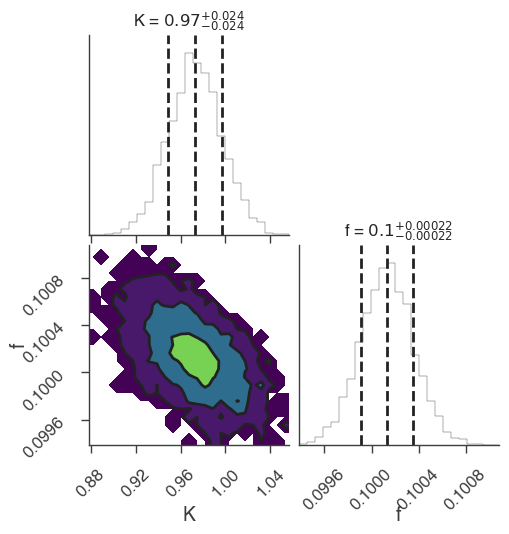

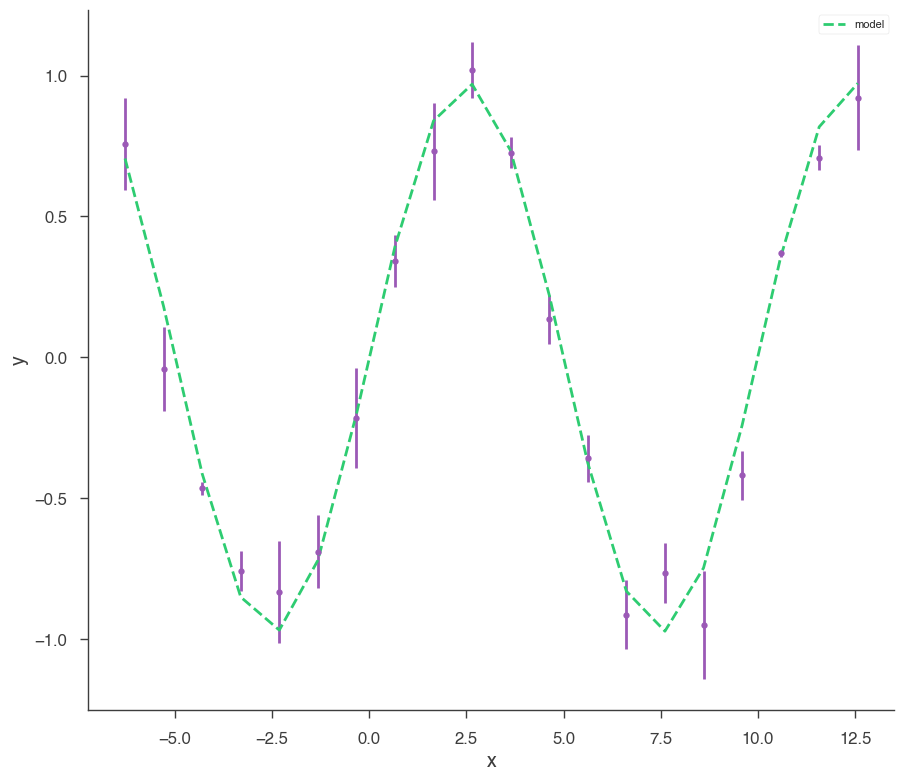

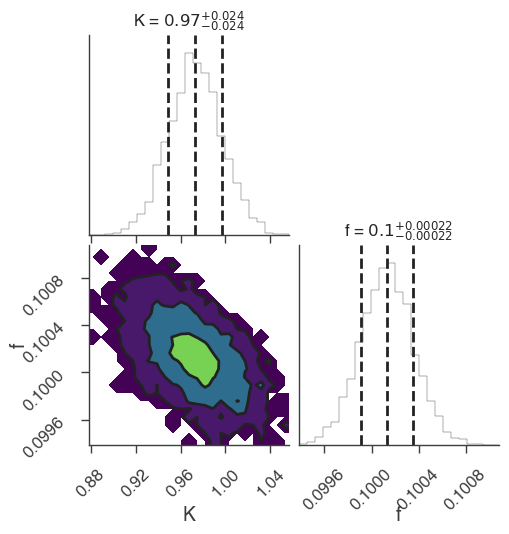

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

02:11:00 INFO      sampler set to zeus                                                     ]8;id=403559;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=136143;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 51.83it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:11, 53.21it/s]

Sampling progress :   3%|▎         | 18/625 [00:00<00:10, 56.10it/s]

Sampling progress :   4%|▍         | 25/625 [00:00<00:10, 59.50it/s]

Sampling progress :   5%|▌         | 33/625 [00:00<00:09, 64.24it/s]

Sampling progress :   6%|▋         | 40/625 [00:00<00:09, 60.06it/s]

Sampling progress :   8%|▊         | 47/625 [00:00<00:09, 60.79it/s]

Sampling progress :   9%|▉         | 55/625 [00:00<00:08, 65.03it/s]

Sampling progress :  10%|▉         | 62/625 [00:01<00:08, 64.79it/s]

Sampling progress :  11%|█         | 70/625 [00:01<00:08, 67.88it/s]

Sampling progress :  12%|█▏        | 78/625 [00:01<00:07, 70.44it/s]

Sampling progress :  14%|█▍        | 86/625 [00:01<00:08, 63.66it/s]

Sampling progress :  15%|█▍        | 93/625 [00:01<00:08, 62.22it/s]

Sampling progress :  16%|█▌        | 100/625 [00:01<00:08, 60.00it/s]

Sampling progress :  17%|█▋        | 107/625 [00:01<00:08, 58.57it/s]

Sampling progress :  18%|█▊        | 113/625 [00:01<00:08, 57.84it/s]

Sampling progress :  19%|█▉        | 119/625 [00:01<00:08, 57.86it/s]

Sampling progress :  20%|██        | 126/625 [00:02<00:08, 61.06it/s]

Sampling progress :  21%|██▏       | 133/625 [00:02<00:07, 61.84it/s]

Sampling progress :  22%|██▏       | 140/625 [00:02<00:07, 62.13it/s]

Sampling progress :  24%|██▎       | 147/625 [00:02<00:08, 58.60it/s]

Sampling progress :  25%|██▍       | 154/625 [00:02<00:07, 59.69it/s]

Sampling progress :  26%|██▌       | 161/625 [00:02<00:07, 58.79it/s]

Sampling progress :  27%|██▋       | 167/625 [00:02<00:08, 56.09it/s]

Sampling progress :  28%|██▊       | 173/625 [00:02<00:08, 54.88it/s]

Sampling progress :  29%|██▉       | 180/625 [00:02<00:07, 57.29it/s]

Sampling progress :  30%|███       | 188/625 [00:03<00:07, 61.87it/s]

Sampling progress :  31%|███       | 195/625 [00:03<00:06, 63.29it/s]

Sampling progress :  32%|███▏      | 202/625 [00:03<00:07, 59.96it/s]

Sampling progress :  33%|███▎      | 209/625 [00:03<00:07, 56.36it/s]

Sampling progress :  34%|███▍      | 215/625 [00:03<00:07, 52.91it/s]

Sampling progress :  35%|███▌      | 221/625 [00:03<00:07, 50.72it/s]

Sampling progress :  36%|███▋      | 227/625 [00:03<00:07, 51.30it/s]

Sampling progress :  37%|███▋      | 233/625 [00:03<00:08, 47.97it/s]

Sampling progress :  38%|███▊      | 239/625 [00:04<00:07, 49.75it/s]

Sampling progress :  39%|███▉      | 245/625 [00:04<00:07, 50.73it/s]

Sampling progress :  40%|████      | 251/625 [00:04<00:07, 49.54it/s]

Sampling progress :  41%|████      | 256/625 [00:04<00:08, 45.30it/s]

Sampling progress :  42%|████▏     | 261/625 [00:04<00:08, 44.09it/s]

Sampling progress :  43%|████▎     | 267/625 [00:04<00:07, 47.06it/s]

Sampling progress :  44%|████▎     | 272/625 [00:04<00:07, 47.62it/s]

Sampling progress :  45%|████▍     | 279/625 [00:04<00:06, 51.16it/s]

Sampling progress :  46%|████▌     | 285/625 [00:05<00:08, 38.32it/s]

Sampling progress :  47%|████▋     | 291/625 [00:05<00:07, 42.16it/s]

Sampling progress :  47%|████▋     | 296/625 [00:05<00:07, 41.58it/s]

Sampling progress :  48%|████▊     | 301/625 [00:05<00:07, 43.30it/s]

Sampling progress :  49%|████▉     | 306/625 [00:05<00:07, 43.80it/s]

Sampling progress :  50%|████▉     | 311/625 [00:05<00:08, 39.08it/s]

Sampling progress :  51%|█████     | 316/625 [00:05<00:08, 35.00it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:06<00:07, 38.34it/s]

Sampling progress :  52%|█████▏    | 326/625 [00:06<00:07, 40.48it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:06<00:06, 47.27it/s]

Sampling progress :  54%|█████▍    | 340/625 [00:06<00:05, 51.80it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:06<00:05, 51.72it/s]

Sampling progress :  56%|█████▋    | 352/625 [00:06<00:05, 53.82it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:06<00:05, 52.73it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:06<00:04, 53.91it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:06<00:04, 54.03it/s]

Sampling progress :  60%|██████    | 377/625 [00:07<00:04, 58.35it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:07<00:04, 56.92it/s]

Sampling progress :  62%|██████▏   | 389/625 [00:07<00:04, 56.58it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:07<00:04, 54.05it/s]

Sampling progress :  64%|██████▍   | 401/625 [00:07<00:04, 55.47it/s]

Sampling progress :  65%|██████▌   | 407/625 [00:07<00:03, 55.83it/s]

Sampling progress :  66%|██████▌   | 413/625 [00:07<00:03, 54.83it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:07<00:03, 52.29it/s]

Sampling progress :  68%|██████▊   | 425/625 [00:07<00:03, 52.48it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:08<00:03, 49.03it/s]

Sampling progress :  70%|██████▉   | 436/625 [00:08<00:03, 48.36it/s]

Sampling progress :  71%|███████   | 441/625 [00:08<00:03, 47.29it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:08<00:03, 45.98it/s]

Sampling progress :  72%|███████▏  | 451/625 [00:08<00:03, 46.62it/s]

Sampling progress :  73%|███████▎  | 456/625 [00:08<00:03, 45.49it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:08<00:03, 46.23it/s]

Sampling progress :  75%|███████▍  | 467/625 [00:08<00:03, 48.56it/s]

Sampling progress :  76%|███████▌  | 472/625 [00:08<00:03, 47.44it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:09<00:03, 47.23it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:09<00:03, 45.99it/s]

Sampling progress :  78%|███████▊  | 487/625 [00:09<00:02, 46.27it/s]

Sampling progress :  79%|███████▊  | 492/625 [00:09<00:02, 44.50it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:09<00:02, 44.30it/s]

Sampling progress :  80%|████████  | 503/625 [00:09<00:02, 46.66it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:09<00:02, 48.11it/s]

Sampling progress :  82%|████████▏ | 514/625 [00:09<00:02, 46.31it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:10<00:02, 43.66it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:10<00:02, 45.29it/s]

Sampling progress :  85%|████████▍ | 529/625 [00:10<00:02, 45.58it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:10<00:01, 46.43it/s]

Sampling progress :  86%|████████▋ | 540/625 [00:10<00:01, 49.36it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:10<00:01, 48.30it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:10<00:01, 49.25it/s]

Sampling progress :  89%|████████▉ | 557/625 [00:10<00:01, 51.17it/s]

Sampling progress :  90%|█████████ | 563/625 [00:10<00:01, 52.14it/s]

Sampling progress :  91%|█████████ | 569/625 [00:10<00:01, 52.87it/s]

Sampling progress :  92%|█████████▏| 575/625 [00:11<00:01, 49.23it/s]

Sampling progress :  93%|█████████▎| 580/625 [00:11<00:00, 47.40it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:11<00:00, 45.43it/s]

Sampling progress :  94%|█████████▍| 590/625 [00:11<00:00, 44.80it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:11<00:00, 45.84it/s]

Sampling progress :  96%|█████████▌| 601/625 [00:11<00:00, 48.13it/s]

Sampling progress :  97%|█████████▋| 606/625 [00:11<00:00, 47.52it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:11<00:00, 46.52it/s]

Sampling progress :  99%|█████████▊| 616/625 [00:12<00:00, 46.63it/s]

Sampling progress :  99%|█████████▉| 621/625 [00:12<00:00, 43.97it/s]

Sampling progress : 100%|██████████| 625/625 [00:12<00:00, 51.03it/s]

02:11:13 INFO      fit restored to maximum of posterior                                         ]8;id=328172;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=673949;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=189764;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=370209;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 15


Scale Factor: 0.790306


Mean Integrated Autocorrelation Time: 3.14


Effective Sample Size: 3980.89


Number of Log Probability Evaluations: 69271


Effective Samples per Log Probability Evaluation: 0.057468


None


Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K        (9.74 -0.25 +0.23) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0012 -0.0022 +0.0024) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -14.827659
total       -14.827659

Values of statistical measures:

statistical measures
AIC              34.361201
BIC              35.646783
DIC              33.800731
PDIC              2.071195

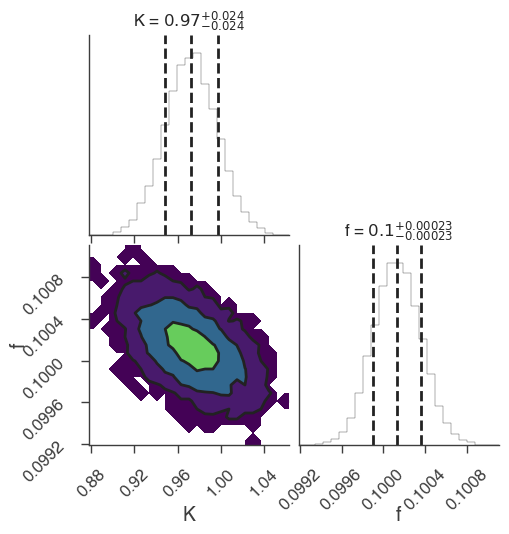

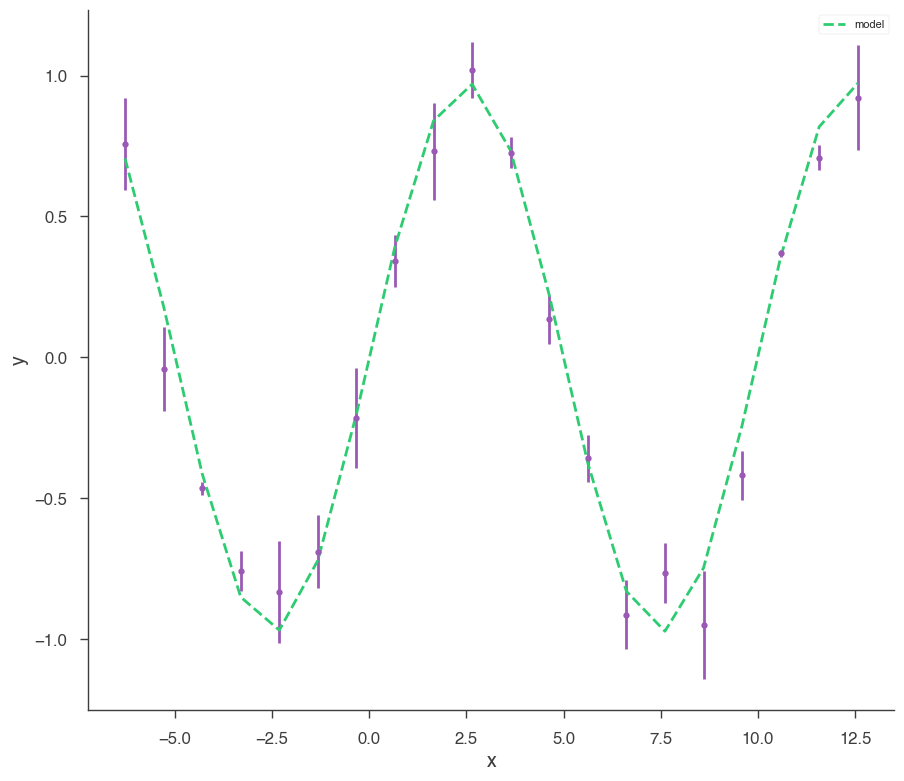

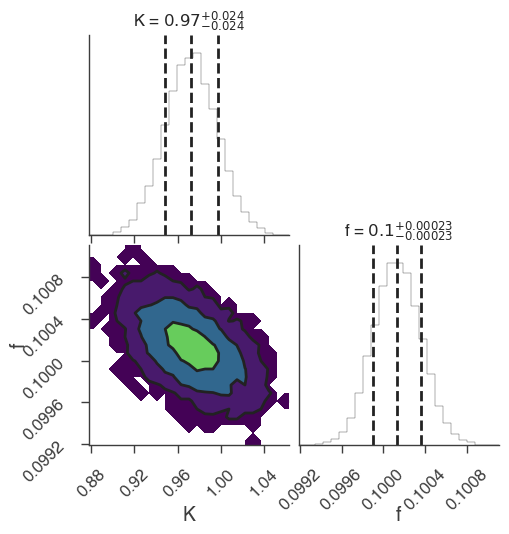

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

02:11:14 INFO      sampler set to ultranest                                                ]8;id=633860;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=253988;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 15058


[ultranest]   logZ = -24.74 +- 0.12


[ultranest] Effective samples strategy satisfied (ESS = 966.0, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.08 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


02:11:26 INFO      fit restored to maximum of posterior                                         ]8;id=554536;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=337802;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=883087;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=433180;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

result             unit
parameter                                                                  
demo.spectrum.main.Sin.K           (9.73 +/- 0.24) x 10^-1  1 / (cm2 keV s)
demo.spectrum.main.Sin.f  (1.0011 -0.0021 +0.0023) x 10^-1        rad / keV

Values of -log(posterior) at the minimum:

-log(posterior)
demo        -14.831386
total       -14.831386

Values of statistical measures:

statistical measures
AIC                34.368655
BIC                35.654237
DIC                33.558169
PDIC                1.951445
log(Z)            -10.735936

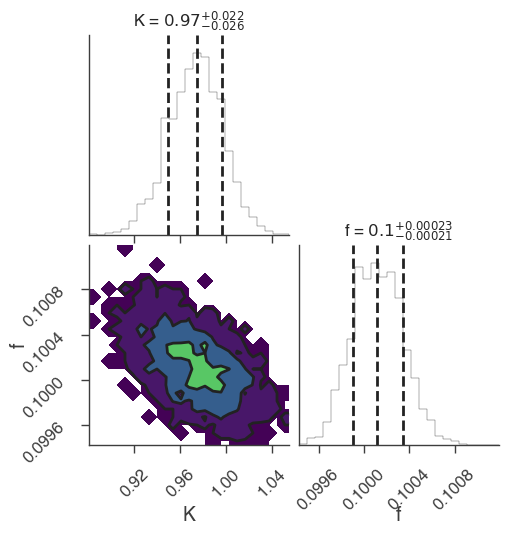

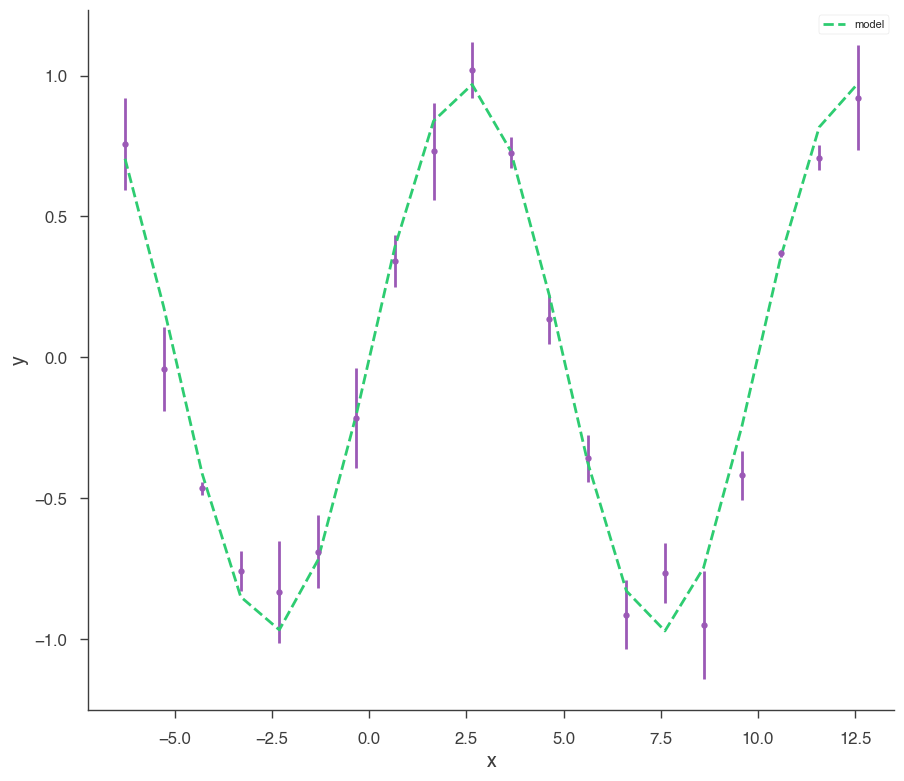

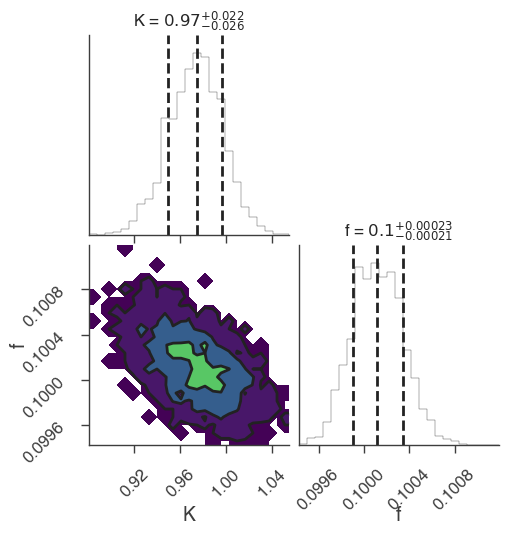

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()